<a href="https://colab.research.google.com/github/al-dayviid21/Create-ANN-Model/blob/main/GPUANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Running ANN using Google Colab

In [ ]:
!pip install -q keras

Epoch 1/100
536/536 [==============================] - 4s 4ms/step - loss: 0.5412 - accuracy: 0.7962 - val_loss: 0.4949 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4645 - accuracy: 0.7962 - val_loss: 0.4604 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4446 - accuracy: 0.7962 - val_loss: 0.4475 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4373 - accuracy: 0.7962 - val_loss: 0.4436 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4326 - accuracy: 0.7962 - val_loss: 0.4414 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4286 - accuracy: 0.7962 - val_loss: 0.4391 - val_accuracy: 0.7952
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4264 - accuracy: 0.7962 - val_loss: 0.4366 - val_accuracy: 0.7948

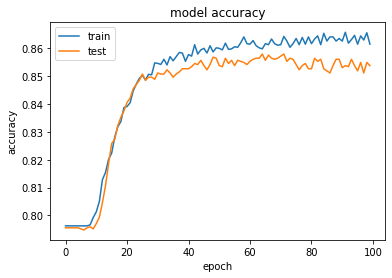

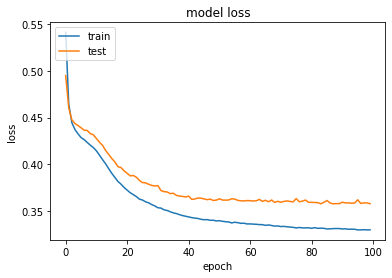

63/63 [==============================] - 0s 1ms/step


In [ ]:
## Artificial Neural Networks

# 1. Data Preprocessing

# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Dataset
df = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

# Split dataset into X and y variables
X = df.iloc[:, 3:13]
y = df.iloc[:,13]

# create dummies
geography = pd.get_dummies(df['Geography'], drop_first=True)
gender = pd.get_dummies(df['Gender'], drop_first=True)

# join the dummies and exisitng features together
X = pd.concat([X, geography, gender], axis=1)

# drop unwanted columns
X.drop(['Geography', 'Gender'], axis=1, inplace=True)

# split dataset into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Create ANN Model
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU, LeakyReLU, PReLU, ELU
from tensorflow.keras.layers import Dropout


# Initialize ANN
classifier = Sequential()

# Add input layer and first hidden layer
classifier.add(Dense(units=6, activation='relu', kernel_initializer='he_uniform', input_dim=11))
## classifier.add(Dropout(0.3))

# Add second hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))
## classifier.add(Dropout(0.3))

# Add output layer
classifier.add(Dense(units=1, activation='sigmoid', kernel_initializer='glorot_uniform'))

# compile classifier
classifier.compile(optimizer='adam',metrics=['accuracy'], loss='binary_crossentropy')

# fit the ANN model
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

# list all model history
print(model_history.history.keys())

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# make prediction
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test, y_pred)

Test Whether GPU Is Working

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

Which GPU are we using?

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10370659676966424197
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14417788928
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 18222402452851390955
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

RAM Information

In [ ]:
!cat /proc/meminfo

MemTotal:       13297200 kB
MemFree:         7799612 kB
MemAvailable:   11307672 kB
Buffers:          343188 kB
Cached:          3336352 kB
SwapCached:            0 kB
Active:           623336 kB
Inactive:        4506296 kB
Active(anon):        928 kB
Inactive(anon):  1434544 kB
Active(file):     622408 kB
Inactive(file):  3071752 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               208 kB
Writeback:             0 kB
AnonPages:       1450120 kB
Mapped:           679208 kB
Shmem:             11544 kB
KReclaimable:     110700 kB
Slab:             152092 kB
SReclaimable:     110700 kB
SUnreclaim:        41392 kB
KernelStack:        4368 kB
PageTables:        19200 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6648600 kB
Committed_AS:    3445588 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       58116 kB
VmallocChunk:          0 kB
Percpu:          

CPU Information

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
stepping	: 3
microcode	: 0xffffffff
cpu MHz		: 2000.138
cache size	: 39424 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmi